In [3]:
import os
from avatar import AvatarController, AvatarAnimationHierarchy

mesh_path = '/Users/azhong/facemaker-new/ARFace/ARFace/resources/meshes/'
controller_path = os.path.join(mesh_path,
                               'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_controllers.json')
animation_hierarchy_path = os.path.join(mesh_path,
                                        'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_animation_hierarchy.json')
custom_shape_path = os.path.join(mesh_path,
                                 'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_custom_shapes.json')

ah = AvatarAnimationHierarchy(animation_hierarchy_path)
ah.load_custom_shapes(custom_shape_path)
ac = AvatarController(controller_path)

high_level_controller_to_color = {"Jnt_L_eye_MID_GP": 'black',
                                  "Ctrl_L_EyeLid_SW_CT": 'black', 
                                  
                                  "Jnt_R_eye_MID_GP": 'black', 
                                  "Ctrl_R_EyeLid_SW_CT": 'black',
                                  
                                  "Ctrl_L_High_Cheek_All": 'blue',
                                  "Jnt_L_High_Cheek_3": 'blue',
                                  
                                  "Ctrl_R_High_Cheek_All": 'blue',
                                  "Jnt_R_High_Cheek_3": 'blue',
                                  
                                  "Ctrl_L_Outer_Cheek_P": 'orange',
                                  "Jnt_L_Outer_cheek_2": 'orange',                                  
                                  
                                  "Ctrl_R_Outer_Cheek_P": 'orange',
                                  "Jnt_R_Outer_cheek_2": 'orange',
                                  
                                  "Jnt_R_Jaw_O_0": 'purple',
                                  "Jnt_R_Outer_cheek_3": 'black',
                                  "Jnt_R_Outer_cheek_1": 'green',
#                                  "Ctrl_R_Inner_Cheek_All": 'purple',
                                  
                                  "Ctrl_L_Corner_Lip": 'red', 
#                                   "Ctrl_L_Upper_Lips_Tri_1": 'yellow',  
#                                   "Ctrl_L_Upper_Lips_Tri_2": 'yellow',
                                  "Jnt_L_Corner_Lip_1_2": 'red',
                                  
                                  "Ctrl_R_Corner_Lip": 'red',
#                                   "Ctrl_R_Upper_Lips_Tri_1": 'yellow', 
#                                   "Ctrl_R_Upper_Lips_Tri_2": 'yellow',
                                  "Jnt_R_Corner_Lip_1_2": 'red',
                          
                                  "Ctrl_M_Mouth_A": 'red',
                                  "Ctrl_Upper_Teeth": 'red',
                                  "Ctrl_Lower_Teeth": 'red',
                                  
                                  
                                  "Ctrl_Nose_A": 'cyan',
                                  "Jnt_Nose": 'cyan',
                        
                                  "Ctrl_L_Eyebrow_A_W": 'purple',
                                  "Jnt_L_Eyebrow_2": 'purple',
                                  "Ctrl_R_Eyebrow_A_W": 'purple',
                                  "Jnt_R_Eyebrow_2": 'purple',
                                 
                                  "Ctrl_Chin": 'brown',
                                  #Jnt_M_Chin": 'brown',
                                  "Jnt_Chin": 'brown',
                                  #"Ctrl__Lower": 'brown',
                                  #"Jnt_L_Chin_Upper": 'black', 
                                  #"Jnt_Jaw": 'purple',
                                 }

depth_to_marker_type = {
    0: '.',
    1: '+',
    2: 's',
    3: 'v',
}

depth_to_marker_type_2 = {
    0: '*',
    1: '+',
    2: 's',
    3: 'v',
}

def move_high_level_controllers(ac, ah, controllers, move_type, x, y, z):
    for controller in controllers:
        short_names = ac.get_joint_short_names(controller)
        names = []
        for short_name in short_names:
            names.append(ah.get_name_by_short_name(short_name))

        ultimate_parent_names = ah.get_joints_ultimate_parents(names)
        #print(ultimate_parent_names)
        for ultimate_parent_name in ultimate_parent_names:
            if move_type == 'translate':
                ah.translate_joint(ultimate_parent_name, x, y, z)
            elif move_type == 'scale':
                ah.scale_joint(ultimate_parent_name, x, y, z)
            else:
                assert False

#move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_A_W', 'Ctrl_L_EyeLid_SW_CT', 'Ctrl_L_Outer_Cheek_P', 'Ctrl_L_High_Cheek_All', 'Ctrl_L_Corner_Lip'], 'translate', 1, 0, 0)
#move_high_level_controllers(ac, ah, ['Ctrl_Nose_A'], 'scale', 0.5, 0, 0)
#move_high_level_controllers(ac, ah, ['Ctrl_Nose_A'], 'translate', 0, 1, 0)
#ac.get_joint_short_names('Chin_UI')

WARNING already seen Jnt_L_Eyebrow_Outer_LW


<IPython.core.display.Javascript object>


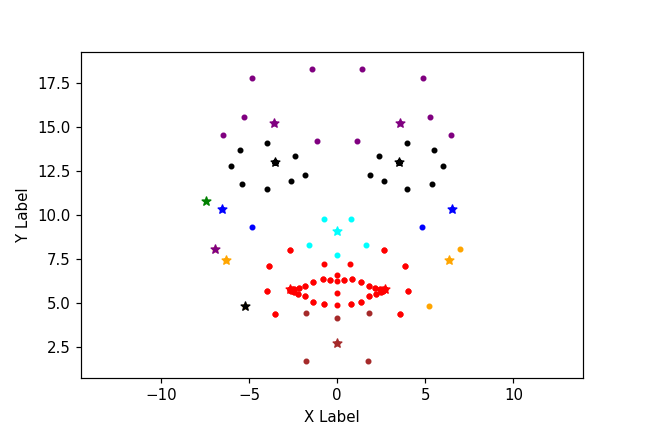

In [4]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.tight_layout()

def visualize_joint_and_its_children(ax, ah, name, high_level_controller_to_color, depth, depth_to_marker_type, is_3d = True):
    joint = ah.get_joint_by_name(name)
    joint_transform = ah.get_transform(name)
    if depth == 0:
        if is_3d:
            ax.scatter(joint_transform[0][3], -joint_transform[2][3], joint_transform[1][3], marker=depth_to_marker_type[depth], c=high_level_controller_to_color[controller], label=name)
        else:
            ax.scatter([joint_transform[0][3]], [joint_transform[1][3]],marker=depth_to_marker_type[depth], c=high_level_controller_to_color[controller], label=name)
    depth = depth + 1
    if joint['children'] != []:
        for children_name in joint['children']:
            visualize_joint_and_its_children(ax, ah, children_name, high_level_controller_to_color, depth, depth_to_marker_type, is_3d)

            
fig = plt.figure(1)
is_3d = False
if is_3d:
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('-Z Label')
    ax.set_zlabel('Y Label')
    ax.axis('equal')
else:
    ax = fig.add_subplot(111)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.axis('equal')
for controller in high_level_controller_to_color.keys():
    if ac.is_controller(controller):
        #pass
        short_names = ac.get_joint_short_names(controller)
        assert type(short_names) is list
        for short_name in short_names:
            name = ah.get_name_by_short_name(short_name)
            visualize_joint_and_its_children(ax, ah, name, high_level_controller_to_color, 0, depth_to_marker_type, is_3d = is_3d)
    else:
        name = ah.get_name_by_short_name(controller)
        visualize_joint_and_its_children(ax, ah, name, high_level_controller_to_color, 0, depth_to_marker_type_2, is_3d = is_3d)
        
plt.show()

In [14]:
ah.export_custom_shapes("/Users/azhong/facemaker/ARFace/ARFace/resources/meshes/Female_BaseHead_V07_new/Female_BaseHead_V07_new_custom_shapes.json")

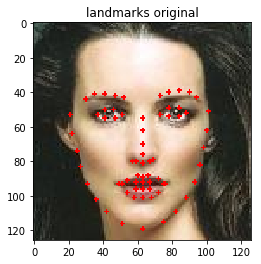

WARNING already seen Jnt_L_Eyebrow_Outer_LW
nose [3.08031324e-15 9.09498483e+00 1.34710153e+01]
left_mouth_corner [-2.69569325  5.80804539 10.50235176]
base 3.933515166033642
0.4808565982336331
0.8552184687665533
[11.905113220214844, 5.829215049743652, 9.183391571044922, 9.159815788269043, 18.52328109741211, 15.736005783081055, 6.74530029296875, 21.92876, -0.20311927795410156, 2.500208, 1.4553528, 2.5883904, 4.927075386047363, 5.829215049743652, 6.367980003356934, 6.099308967590332, 4.631072044372559, 3.217902183532715]
mouth offset -0.24730385297850033


In [6]:
%matplotlib inline
import cv2
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

from facetrackinglib.tensorflow.TFInference import TFInference

ftlib_dir = './facetrackinglib/tensorflow/'
face_detector = cv2.CascadeClassifier(os.path.join(ftlib_dir, 'models/haarcascade_frontalface_default.xml'))
refined_landmark_inference = TFInference(model_path = os.path.join(ftlib_dir, 
                                                                  'models/faceoff_kao_onet_64x64x3_face_56_face_136_batch_32_random_hflip_False_reduce_lr_0.5.600-0.39-0.48.hdf5.pb'
                                                                  #'models/faceoff_kao_onet_64x64x3_face_56_face_136_batch_32_random_hflip_False_reduce_lr_0.5.464-0.26-0.26.hdf5.pb'                                                         
                                                                  ),
                                         input_name = 'import/input_1',
                                         output_names = ['import/output_node0'])
refined_landmark_target_size = refined_landmark_inference.input_shape[0:2]

def extract_face_signature(landmarks):
    nose_x, nose_y = landmarks[30]
    left_eye_brow_y = landmarks[20][1]
    right_eye_brow_y = landmarks[23][1]
    left_eye_x, left_eye_y = list((np.array(landmarks[36]) + np.array(landmarks[39]))/2.0)
    right_eye_x, right_eye_y = list((np.array(landmarks[42]) + np.array(landmarks[45]))/2.0)
    left_chin_high_x = landmarks[2][0]
    right_chin_high_x = landmarks[14][0]    
    left_chin_low_x = landmarks[4][0]
    right_chin_low_x = landmarks[12][0]
    left_mouth_corner_x, left_mouth_corner_y = landmarks[48]
    mouth_center_y = (landmarks[62][1] + landmarks[66][1])/2.0
    right_mouth_corner_x, right_mouth_corner_y = landmarks[54]
    chin_y = landmarks[8][1]
    eye_top_down = max(landmarks[41][1] - landmarks[37][1], landmarks[40][1] - landmarks[38][1],
                       landmarks[47][1] - landmarks[43][1], landmarks[46][1] - landmarks[44][1])
    left_chin_x = landmarks[6][1]
    right_chin_x = landmarks[10][1]
    upper_lip_y = landmarks[51][1]
    upper_lip_low_y = landmarks[62][1]
    lower_lip_y = landmarks[57][1]
    lower_lip_high_y = landmarks[66][1]
    
    signature = [
        nose_y - (left_eye_y + right_eye_y)/2.0,
        ((left_eye_y - left_eye_brow_y)+(right_eye_y-right_eye_brow_y))/2.0,
        mouth_center_y - nose_y,
        ((nose_x - left_eye_x) + (right_eye_x - nose_x))/2.0,
        ((nose_x - left_chin_high_x) + (right_chin_high_x - nose_x))/2.0,
        ((nose_x - left_chin_low_x) + (right_chin_low_x - nose_x))/2.0,
        (right_mouth_corner_x - left_mouth_corner_x)/2.0,
        chin_y-nose_y,
        ((nose_x - left_chin_x) + (right_chin_x - nose_x))/2.0,
        eye_top_down,
        upper_lip_low_y - upper_lip_y,
        lower_lip_y - lower_lip_high_y,
        (left_eye_y+right_eye_y-landmarks[21][1]-landmarks[22][1])/2.0,
        (left_eye_y+right_eye_y-landmarks[20][1]-landmarks[23][1])/2.0,
        (left_eye_y+right_eye_y-landmarks[19][1]-landmarks[24][1])/2.0,
        (left_eye_y+right_eye_y-landmarks[18][1]-landmarks[25][1])/2.0,
        (left_eye_y+right_eye_y-landmarks[17][1]-landmarks[26][1])/2.0,
        (- landmarks[31][0] + landmarks[35][0])/2.0,
    ]
    return signature

def map_signature_to_rig(signature, ac, ah):
    nose_location = ah.get_location(ah.get_name_by_short_name('Jnt_Nose'))
    print('nose', nose_location)
    left_eye_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_eye_MID_GP'))
    left_eye_brow_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_Eyebrow_2'))
    left_mouth_corner_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_Corner_Lip_1_2'))
    left_nostril_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_Nostril'))
    print('left_mouth_corner', left_mouth_corner_location)

    left_chin_high_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_High_Cheek_3'))
    left_chin_low_location = ah.get_location(ah.get_name_by_short_name('Jnt_R_Outer_cheek_2'))
    chin_location = ah.get_location(ah.get_name_by_short_name('Jnt_Chin'))
    base = left_eye_location[1] - nose_location[1]
    print('base', base)
    eye_brow_offset_y = base / signature[0] * signature[1] - (left_eye_brow_location[1] - left_eye_location[1])
    #from middle to corner
    eye_brow_y_const_offset=-0.5
    eye_brow_offsets_y = [
        base/signature[0] * signature[12] - (ah.get_location(ah.get_name_by_short_name('Jnt_R_Eyebrow_1'))[1] - left_eye_location[1])+eye_brow_y_const_offset-1.5,        
        base/signature[0] * signature[13] - (ah.get_location(ah.get_name_by_short_name('Jnt_R_Eyebrow_2'))[1] - left_eye_location[1])+eye_brow_y_const_offset,        
        base/signature[0] * signature[14] - (ah.get_location(ah.get_name_by_short_name('Jnt_R_Eyebrow_3'))[1] - left_eye_location[1])+eye_brow_y_const_offset+0.2,        
        base/signature[0] * (signature[15]+signature[16])/2.0 - (ah.get_location(ah.get_name_by_short_name('Jnt_R_Eyebrow_4'))[1] - left_eye_location[1])+eye_brow_y_const_offset+0.2,        
    
    ]
    
    nostril_offset = -(base/signature[0] * signature[17] - (nose_location[0] -  left_nostril_location[0]))-0.5    
    mouth_offset_y = -(base / signature[0] * signature[2] - (nose_location[1] - left_mouth_corner_location[1]))
    eye_offset_x = -(base / signature[0] * signature[3] - (nose_location[0] - left_eye_location[0]))
    chin_high_offset_x = -(base / signature[0] * signature[4] - (nose_location[0] - left_chin_high_location[0]))
    chin_low_offset_x = -(base / signature[0] * signature[5] - (nose_location[0] - left_chin_low_location[0]))
    
    chin_offset_y = -(base / signature[0] * signature[7] - (nose_location[1] - chin_location[1]))
    # HACK: to make rig look better
    chin_offset_y = chin_offset_y + 0.6
    # HACK 1.0
    mouth_offset_x = -(base / signature[0] * signature[6]*1 - (nose_location[0] - left_mouth_corner_location[0]))
    # HACK 1
    eye_ratio = base/signature[0] * signature[9] / 1 - 1
    print(base/signature[0]*signature[10])
    print(base/signature[0]*signature[11])
    upper_lip_ratio = base/signature[0]*signature[10] / 0.8 - 1
    lower_lip_ratio = base/signature[0]*signature[11] / 0.8 - 1
    eye_brow_offset_y += eye_brow_y_const_offset
    mouth_offset_y -= 0.5
    print(signature)
    
    move_high_level_controllers(ac, ah, ['Ctrl_R_EyeLid_SW_CT'], 'translate', eye_offset_x, 0, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_EyeLid_SW_CT'], 'scale', 0, eye_ratio, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_EyeLid_SW_CT'], 'translate', -eye_offset_x, 0, 0) 
    move_high_level_controllers(ac, ah, ['Ctrl_L_EyeLid_SW_CT'], 'scale', 0, eye_ratio, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_High_Cheek_All'], 'translate', chin_high_offset_x, 0, 0) 
    move_high_level_controllers(ac, ah, ['Ctrl_L_High_Cheek_All'], 'translate', -chin_high_offset_x, 0, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Outer_Cheek_P'], 'translate', chin_low_offset_x, 0, 0) 
    move_high_level_controllers(ac, ah, ['Ctrl_L_Outer_Cheek_P'], 'translate', -chin_low_offset_x, 0, 0) 
    
    #move_high_level_controllers(ac, ah, ['Ctrl_R_Eyebrow_A_W'], 'translate', eye_offset_x, eye_brow_offset_y, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Eyebrow_1'], 'translate', eye_offset_x, eye_brow_offsets_y[0], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Eyebrow_2'], 'translate', eye_offset_x, eye_brow_offsets_y[1], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Eyebrow_3'], 'translate', eye_offset_x, eye_brow_offsets_y[2], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Eyebrow_4'], 'translate', eye_offset_x, eye_brow_offsets_y[3], 0)
    #move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_A_W'], 'translate', -eye_offset_x, eye_brow_offset_y, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_1'], 'translate', -eye_offset_x, eye_brow_offsets_y[0], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_2'], 'translate', -eye_offset_x, eye_brow_offsets_y[1], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_3'], 'translate', -eye_offset_x, eye_brow_offsets_y[2], 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_Eyebrow_4'], 'translate', -eye_offset_x, eye_brow_offsets_y[3], 0)
    
    move_high_level_controllers(ac, ah, ['Ctrl_R_Corner_Lip', 
#                                          'Ctrl_R_Upper_Lips_Tri_1', 
#                                          'Ctrl_R_Upper_Lips_Tri_2'
                                        ], 'translate', mouth_offset_x, 0, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_L_Corner_Lip', 
#                                          'Ctrl_L_Upper_Lips_Tri_1', 
#                                          'Ctrl_L_Upper_Lips_Tri_2', 
                                        ], 'translate', -mouth_offset_x, 0, 0)
    print('mouth offset', mouth_offset_y)
    move_high_level_controllers(ac, ah, ['Ctrl_M_Mouth_A', 'Ctrl_Upper_Teeth', 'Ctrl_Lower_Teeth'], 'translate', 0, mouth_offset_y, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_Chin'], 'translate', 0, chin_offset_y, 0)
#     move_high_level_controllers(ac, ah, ['Ctrl_R_Inner_Eyelid_Corner'], 'translate', -1, 0, 0)
#     move_high_level_controllers(ac, ah, ['Ctrl_R_Outer_Eyelid_Corner'], 'translate', -1, 0, 0)
    #move_high_level_controllers(ac, ah, ['Ctrl_Ctrl_R_Outer_cheek_3'], 'translate', -2, 0, 0)
    #move_high_level_controllers(ac, ah, ['Ctrl_Chin'], 'scale', 2, 0, 0)
    #move_high_level_controllers(ac, ah, ['Ctrl_Chin_Double'], 'scale', -0.5, 0, 0)
#     move_high_level_controllers(ac, ah, ['Ctrl_R_Chin_Lower'], 'translate', -1, 0, 0)
#     move_high_level_controllers(ac, ah, ['Ctrl_R_Chin_Upper'], 'translate', -2, 0, 0)
    #TODO: find better way than this to shape mouth, scale on joint
    move_high_level_controllers(ac, ah, ['Ctrl_Upper_Lips_All'], 'scale', 0, upper_lip_ratio, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_Lower_Lips_All'], 'scale', 0, lower_lip_ratio, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Nostril'], 'translate', nostril_offset, 0, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Nostril_S'], 'translate', nostril_offset/2.0, 0, 0)
    move_high_level_controllers(ac, ah, ['Ctrl_R_Jaw_All'], 'translate', 0, chin_offset_y, 0)    
    move_high_level_controllers(ac, ah, ['Ctrl_L_Jaw_All'], 'translate', 0, chin_offset_y, 0)    
    
from avatar import AvatarController, AvatarAnimationHierarchy

mesh_path = '/Users/azhong/facemaker-new/ARFace/ARFace/resources/meshes/'
controller_path = os.path.join(mesh_path,
                               'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_controllers.json')
animation_hierarchy_path = os.path.join(mesh_path,
                                        'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_animation_hierarchy.json')
custom_shape_path = os.path.join(mesh_path,
                                 'F1_baseHead_Rigging_Done_trimmed/F1_baseHead_Rigging_Done_trimmed_custom_shapes.json')
export_custom_shape_path = os.path.join(mesh_path,
                                 'F1_baseHead_Rigging_Done_trimmed_new/F1_baseHead_Rigging_Done_trimmed_new_custom_shapes.json')
    
counter = 0
#for img_path in glob.glob('data/000026.jpg'):
#for img_path in glob.glob('data/000040.jpg'):
for img_path in glob.glob('data/000035.jpg'):
#for img_path in glob.glob('data/000019.jpg'): 
#for img_path in glob.glob('data/000071.jpg'):
#for img_path in glob.glob('data/000121.jpg'):
#for img_path in glob.glob('data/000022.jpg'):
#for img_path in glob.glob('data/002247.jpg'):
#for img_path in glob.glob('data/000046.jpg'):    
    bgr_image = cv2.imread(img_path)
    gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
    face_rects = face_detector.detectMultiScale(gray_image, 1.3, 5)
    if len(face_rects) == 1:
        face_rect = face_rects[0]
        x, y, w, h = face_rect
        extend_ratio = 0.2
        extend_w = int(w * extend_ratio/2)
        extend_h = int(h * extend_ratio/2)
        face_crop_bgr = bgr_image[(y-extend_h):(y+h+extend_h), (x-extend_w):(x+w+extend_w)]
        face_crop_original_rgb_vis = cv2.cvtColor(face_crop_bgr.copy(), cv2.COLOR_BGR2RGB)
        
        original_shape = face_crop_bgr.shape
        face_crop_bgr = cv2.resize(face_crop_bgr, (refined_landmark_target_size))
        face_crop_bgr_in = ((face_crop_bgr / 255.0) - 0.5) * 2
        face_crop_bgr_in = np.expand_dims(face_crop_bgr_in, 0)
        refined_landmark_prediction = refined_landmark_inference.run(face_crop_bgr_in)

        face_landmarks = []
        for i in range(68):
            face_landmarks.append([refined_landmark_prediction[0][0][i*2], refined_landmark_prediction[0][0][i*2+1]])
            cv2.circle(face_crop_original_rgb_vis, (int(refined_landmark_prediction[0][0][i*2]/refined_landmark_target_size[0]*original_shape[0]),
                                                    int(refined_landmark_prediction[0][0][i*2+1]/refined_landmark_target_size[1]*original_shape[1])),
                       1, (255), -1)
        plt.imshow(face_crop_original_rgb_vis)
        plt.title('landmarks original')
        plt.show()
        
        ah = AvatarAnimationHierarchy(animation_hierarchy_path)
        ah.load_custom_shapes(custom_shape_path)
        ac = AvatarController(controller_path)

        signature = extract_face_signature(face_landmarks)
        map_signature_to_rig(signature, ac, ah)
        ah.export_custom_shapes(export_custom_shape_path)
        counter += 1
        if counter == 10:
            break

In [4]:
import tensorflow as tf
tf.__version__

'1.10.1'

In [3]:
joint = ah.get_joint_by_name(ah.get_name_by_short_name('Jnt_R_eye_MID_GP'))
joint

{'children': ['|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Upper_Eyelid_AW'],
 'name': '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP',
 'orientation': [0.0, 0.0, -100.2782422593841],
 'parents': '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head',
 'position': [-2.52407668236199, 7.361087791956779, 3.521620000000003],
 'rotation': [-4.319581557262758e-12,
  2.915913265600134e-18,
  -3.46411206862822e-17],
 'scale': [1.0, 1.0, 1.0],
 'world_position': [-3.521620000000001, 13.028500000000001, 8.038260000000001],
 'world_rotation': [-180.0, 89.99999999999997, 0.0],
 'world_scaling': [1.0, 1.0, 1.0]}

In [4]:
ah.get_joint_by_name('|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW')

{'children': ['|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Inner_Eyelid_Corner_A_offset|Jnt_R_Inner_Eyelid_Corner_A_offset',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Lower_EyeLid_1|Jnt_R_Lower_EyeLid_1_A',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Lower_EyeLid_2|Jnt_R_Lower_EyeLid_2_A',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Lower_EyeLid_3|Jnt_R_Lower_EyeLid_3_A',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Lower_EyeLid_4|Jnt_R_Lower_EyeLid_4_A',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP|Jnt_R_eye_Lower_Eyelid_AW|loc_R_Lower_EyeLid_5|Jnt_R_Low

In [5]:
ah.get_joint_by_name('|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head')

{'children': ['|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_L_eye_MID_GP',
  '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head|Jnt_R_eye_MID_GP'],
 'name': '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head',
 'orientation': [0.0, 0.0, -162.03689654345686],
 'parents': '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root',
 'position': [9.31516259669196, 3.774758283725532e-15, 2.0683815985948944e-15],
 'rotation': [-1.0251596554527019e-13,
  3.322952508184607e-15,
  3.180554681463514e-15],
 'scale': [1.0, 1.0, 1.0],
 'world_position': [0.0, 9.231499089942108, 1.2456639816607544],
 'world_rotation': [89.99999999999999,
  -10.278242259384117,
  -90.00000000000001],
 'world_scaling': [1.0, 0.9999999999999999, 1.0]}

In [6]:
ah.get_joint_by_name('|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root')

{'children': ['|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root|Jnt_Head'],
 'name': '|Female_GRP|Ctrl_Root_A_GRP|Ctrl_Root_A|Jnt_GRP|Jnt_Head_Root',
 'orientation': [-89.99999999999999, -7.684861197159026, 89.99999999999999],
 'parents': [],
 'position': [0.0, 0.0, 0.0],
 'rotation': [3.180554681463516e-15,
  6.361109362927032e-15,
  -3.180554681463516e-15],
 'scale': [1.0, 1.0, 1.0],
 'world_position': [0.0, 0.0, 0.0],
 'world_rotation': [-89.99999999999999, -7.684861197159027, 89.99999999999999],
 'world_scaling': [1.0, 1.0, 1.0]}